In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
## X,y는 독립변수와 종속변수 관계

np.random.seed(111)
n_samples=1000

In [7]:
# 특성 Feature 생성

X1 = np.random.rand(n_samples) * 100
X2 = np.random.rand(n_samples) * 100
X3 = np.random.rand(n_samples) * 100
X4 = np.random.rand(n_samples) * 100
X_noise = np.random.rand(n_samples) * 100 #노이즈

# X1, X2는 강하게 의존하는 형태, 나머지는 거의 영향 없음 (y는 X1과 X2에 비례)
y = 3 * X1 + 2 * X2 + np.random.randn(n_samples)*10

In [8]:
df = pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'X4':X4,
    'X_noise':X_noise,
    'y':y
})

In [9]:
## 상관계수 확인
df.corr()

,X1,X2,X3,X4,X_noise,y
X1,1.000000,-0.010769,0.006631,0.004226,-0.059031,0.830304
X2,-0.010769,1.000000,-0.025682,-0.009227,0.030495,0.540254
X3,0.006631,-0.025682,1.000000,0.054634,0.018191,-0.010212
X4,0.004226,-0.009227,0.054634,1.000000,-0.010967,-0.001881
X_noise,-0.059031,0.030495,0.018191,-0.010967,1.000000,-0.032196
y,0.830304,0.540254,-0.010212,-0.001881,-0.032196,1.000000


In [10]:
## corr_matrix 확인
corr_matrix = df.corr()['y'].drop('y')

In [11]:
print(corr_matrix)

X1         0.830304
X2         0.540254
X3        -0.010212
X4        -0.001881
X_noise   -0.032196
Name: y, dtype: float64


In [13]:
## 상관계수가 0.5 이상인 특성만 추출
threshold = 0.5 ##treshold를 0.5로 설정
selected_features = corr_matrix[abs(corr_matrix)>threshold].index

print(selected_features)

Index(['X1', 'X2'], dtype='object')


In [14]:
## Linear Regression

# 선택된 피처로 train_test_split

X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, df['y'], test_size=0.2, random_state=111)

# model train
model = LinearRegression()
model.fit(X_train, y_train)

# predict MSE
y_pred = model.predict(X_test)
mse_selected = mean_squared_error(y_test, y_pred)
print('mse_selected', mse_selected)

mse_selected 95.45729480276263


In [15]:
## 전체 특성 데이터와 비교

## Linear Regression
# 데이터분할 전체 피처 사용
X_full = df.drop(columns= ['y'])
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, df['y'], test_size=0.2, random_state=111)

# model train
model = LinearRegression()
model.fit(X_train_full, y_train_full)

# predict MSE
y_pred_full = model.predict(X_test_full)
mse_full = mean_squared_error(y_test_full, y_pred_full)
print('mse_full', mse_full)

mse_full 95.421146775663


In [31]:
95.45729480276263 - 95.421146775663 #선택 특성 mse - 전체 특성 mse

0.036148027099628166

In [17]:
## 특성 피처들 생성

X1 = np.random.rand(n_samples) * 100 
X2 = X1+np.random.rand(n_samples) * 10 # X1과 매우 높은 상관관계
X3 = np.random.rand(n_samples) * 100 
X4 = np.random.rand(n_samples) * 100 
X_noise = np.random.rand(n_samples) * 100 

# y는 X1, X2 강하게 의존하는 관계
y = 3 *X1 + 2 * X3 +np.random.randn(n_samples) * 10

In [18]:
df=pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'X4':X4,
    'X_noise':X_noise,
    'y':y
})

In [19]:
import seaborn as sns

In [28]:
## 상관관계를 확인

#corr_matrix
corr_matrix=df.drop(columns=['y']).corr()
print(corr_matrix)

               X1        X2        X3        X4   X_noise
X1       1.000000  0.994816  0.019450  0.061270  0.068796
X2       0.994816  1.000000  0.015930  0.061432  0.069706
X3       0.019450  0.015930  1.000000 -0.005993 -0.022998
X4       0.061270  0.061432 -0.005993  1.000000  0.023701
X_noise  0.068796  0.069706 -0.022998  0.023701  1.000000


<Axes: >

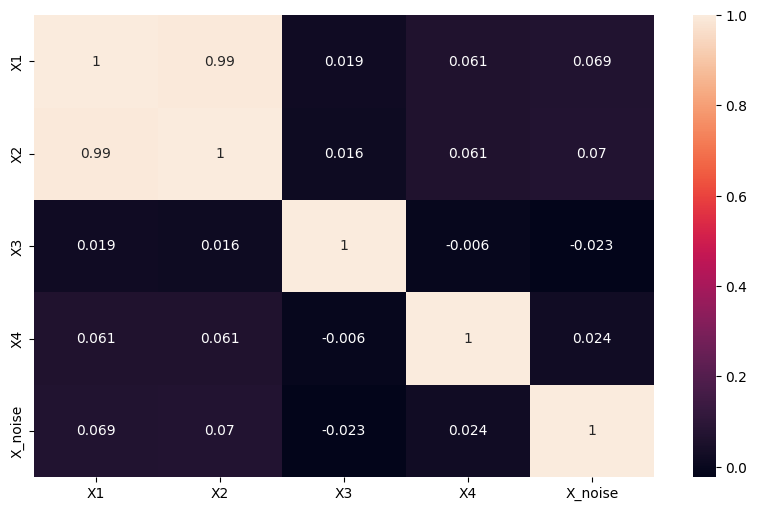

In [22]:
## 히트맵 확인

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)

In [23]:
print(corr_matrix)

               X1        X2        X3        X4   X_noise
X1       1.000000  0.994816  0.019450  0.061270  0.068796
X2       0.994816  1.000000  0.015930  0.061432  0.069706
X3       0.019450  0.015930  1.000000 -0.005993 -0.022998
X4       0.061270  0.061432 -0.005993  1.000000  0.023701
X_noise  0.068796  0.069706 -0.022998  0.023701  1.000000


In [26]:
## 상관계수 threshold가 0.8 이상인 경우 제거가 필요함
# X1, X2 사이 상관관계가 높다 -> 다중공선성의 문제 -> 같이 움직임(X1이 증가하면 X2도 증가, 선형 회귀에서 오차 계산 등에 큰 영향을 줌

threshold = 0.8
to_drop = set()

# 상관계수가 0.8보다 높은 피처만 출력
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            to_drop.add(corr_matrix.columns[i])
print(to_drop)

# 원하는 피처만 제거
X_reduced = df.drop(columns=list(to_drop)+['y'])

X_train, X_test, y_train, y_test = train_test_split(X_reduced, df['y'], test_size=0.2, random_state=111)

{'X2'}


In [29]:
# 상관계수가 높은 피처를 제거했을 때
#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred =model.predict(X_test)
mse_selected =mean_squared_error(y_test, y_pred)
print('mse_selected',mse_selected)

mse_selected 106.62854977848927


In [30]:
## 전체 피처가 다 들어간 경우
#데이터 분할 _전체 피처로
X_full = df.drop(columns = ['y'])
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,df['y'],test_size=0.2,random_state=111)

#모델학습
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

#예측 MSE
y_pred_full =model_full.predict(X_test_full)
mse_full =mean_squared_error(y_test_full, y_pred_full)
print('mse_full',mse_full)

mse_full 106.6654582533013


In [32]:
106.62854977848927 - 106.6654582533013 # 선택 특성 mse - 전체 특성 mse

-0.03690847481202297